In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("titanic-passengers - titanic-passengers.csv")

In [3]:
df.head

<bound method NDFrame.head of      PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [5]:
df3=df

In [6]:
df3['Survived'] = df3['Survived'].replace({'No': 0, 'Yes': 1})

In [7]:
df3['Sex'] = df3['Sex'].replace({'male': 0, 'female': 1})

In [8]:
median_age = df3['Age'].median()

In [9]:
df3['Age'].fillna(median_age, inplace=True)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [12]:
X = df3[['Age', 'Sex', 'SibSp', 'Parch']]
y = df3['Survived']


In [13]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)


DecisionTreeClassifier(max_depth=3, random_state=42)

[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]\nclass = No'),
 Text(0.25, 0.625, 'Age <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = No'),
 Text(0.125, 0.375, 'SibSp <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = Yes'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\nclass = Yes'),
 Text(0.1875, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = No'),
 Text(0.375, 0.375, 'Age <= 77.0\ngini = 0.28\nsamples = 553\nvalue = [460, 93]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 552\nvalue = [460, 92]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.75, 0.625, 'SibSp <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]\nclass = Yes'),
 Text(0.625, 0.375, 'Parch <= 3.5\ngini = 0.349\nsamples = 293\nvalue = [66, 227]\nclass = Yes'),
 Text(0.5625, 0.125, 'gini = 0.332\nsamples = 286\nvalue = [60, 226]\nclass = Yes'),
 Text(0.6875, 0.125,

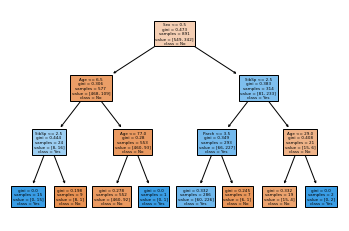

In [14]:
plot_tree(tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
#using random forest 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with 100 estimators:", accuracy)


Accuracy with 100 estimators: 0.7541899441340782


In [22]:
# training with 500 estimators usinf random forest 
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, random_state=42)

In [23]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with 500 estimators:", accuracy)


Accuracy with 500 estimators: 0.7486033519553073
